In [2]:
import scipy.integrate as integrate #nsubmodule
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

Added lambda, fixed integral, P cannot be all same otherwise singular matrix

also, nan will occur when a value negative.

# V2

({0}), not {0}!

Very sensitive to initial guess, might not converge if too far, given we used a first order approximation.

Proof of concept!:

In [3]:
num_GTO = int(input('how many GTOs?'))

#to set integral to 0 if toggle0 == 0
toggle0 = 1

# initial value of P (guess)
#P = np.zeros(2*num_GTO + 1) + 0.1
P = np.array([i*0.1 for i in range (1,2*num_GTO + 2)])
#P = np.array([i*0.5 for i in range (1,2*num_GTO + 2)])

#P = [0.1, 0.4, 2.22, 0.44, 0.53, 0.15, 0.3]

# P = np.array([0.151623,0.851819,0.678914,0.430129,0.1])

#add GTOs to chi
str_chi = 'd[0]*GTO_1(r,a[0])'

for i in range(2, num_GTO +1):
    str_chi += '+ d[{0}]*GTO_1(r,a[{0}]) '.format(i-1)


GTO_1 = lambda r,a: (2*a/pi)**(3/4)*np.exp(-a*r**2)
STO_1 = lambda r: pi**(-1/2)*np.exp(-r)

def par_GTO(r,i):
    global toggle0
    if i <= num_GTO:
        #a_i derivative
        return d[i-1]*(3/(4*a[i-1]) - r**2)*GTO_1(r,a[i-1])
    elif i > num_GTO:
        #b_i derivative
        return GTO_1(r,a[i-1-num_GTO])
    '''
    elif i == 2*num_GTO + 1:
        toggle0 = 0
        return 0
    '''

def double_par_GTO(r,j,k):
    global toggle0
    if j==k:
        if j <= num_GTO:
            return d[j-1]*((3/(4*a[j-1]) - r**2)**2 - 3/(4*a[j-1]**2))*GTO_1(r,a[j-1])
        else:
            toggle0 = 0
            return 0
    elif max(j,k) > num_GTO and min(j,k) <= num_GTO:
        #a_i and d_i derivative
        i = min(j,k)
        return (3/(4*a[i-1]) - r**2)*(GTO_1(r,a[i-1]))
    else:
        toggle0 = 0
        return 0

def integ(x):
    global toggle0
    '''
    if x(1) == 0 :
        #check if x is zero, or should be zero, avoid integrating round off error 
        print('here')
        
        return 0
    '''
    x(1) # evaluate anonymous function, otherwise, you will not be able to check whether it is zero.
    if toggle0 == 0 :
        #check if x is zero, or should be zero, avoid integrating round off error 
        toggle0 = 1
        return 0
    else:
        #print(toggle0)
        #return integrate.quad(lambda r: x(r)*r**2 ,0, np.inf)[0]
        return integrate.quad(lambda r: x(r)*4*pi*r**2 ,0, np.inf)[0]

how many GTOs? 2


In [19]:
#a array
a = P[0 : num_GTO]
#d list
d = P[num_GTO : 2*num_GTO]

lambd = P[2*num_GTO]

main = '''
#All integral definitions
B_integral = lambda i : integ(lambda r:(STO_1(r) - (1-lambd)*({0}))*par_GTO(r,i))
#B_integral = lambda i : integ(lambda r:(STO_1(r) - (1)*({0}))*par_GTO(r,i))

lambd_integral = lambda i : integ(lambda r:({0})*par_GTO(r,i))

W_integral = lambda j,k : (1-lambd)*(integ(lambda r: par_GTO(r,j)*par_GTO(r,k))\
+ integ(lambda r: ({0})*double_par_GTO(r,j,k)))\
- integ(lambda r: (STO_1(r)*double_par_GTO(r,j,k)))

#B
list_B = [B_integral(i) for i in range(1,2*num_GTO + 1)] + \
[0.5*(1 - integ(lambda r: (({0})**2 )))]
array_B = np.array(list_B)

#for our lagrange multiplier
last_row = [lambd_integral(k) for k in range (1,2*num_GTO+1)]\
+[0]

'''.format(str_chi)

exec(main)

# list_W contains many lists, which are rows each
list_W = [[W_integral(j,k) for k in range (1,2*num_GTO+1)]\
          + [lambd_integral(j)] for j in range (1,2*num_GTO+1)]\
            + [last_row]

array_W = np.array(list_W)

#solution must be a small number, otherwise first order approximation will be invalid.
solution = np.linalg.solve(array_W, array_B)
P += solution

print(P)

[ 2.12580020e-01  4.32546744e-01 -2.26747877e+00  2.42727675e+00
  3.79909914e+04]


In [20]:
main = '''
print(integ(lambda r: ({0})**2))'''.format(str_chi)

exec(main)

0.9999999982713969


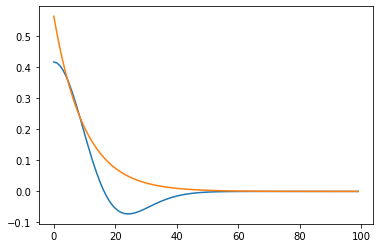

In [22]:
main = '''
CGF = lambda r: {0}
'''.format(str_chi)

exec(main)

x = np.linspace(0,10,100)
plt.plot(CGF(x))
plt.plot(STO_1(x))

In [23]:
solution

array([ 6.16515954e-06, -3.51996959e-06, -1.65662060e-04,  1.06847273e-04,
        1.89950695e+04])